In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay

In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
import math
import collections
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import keras.backend as K 
from tensorflow.python.ops import math_ops


In [3]:

import glob

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Reshape
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.layers import Dropout, InputLayer, LSTM
from keras.layers import Bidirectional, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout, UpSampling1D, AveragePooling1D

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, precision_recall_fscore_support
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [4]:
learning_rate_reduction = ReduceLROnPlateau(monitor='prc',  patience = 5,verbose=1,factor=0.25,min_lr=0.0001)

In [5]:
METRICS = [ 
      #keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      #keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [6]:
x_train_sampled=pd.read_csv('https://raw.githubusercontent.com/sushanthreddyC/Credit_Card_Fraud_Detection/main/data/X_train_sampled.csv')
y_train_sampled=pd.read_csv('https://raw.githubusercontent.com/sushanthreddyC/Credit_Card_Fraud_Detection/main/data/y_train_sampled.csv')
x_val=pd.read_csv('https://raw.githubusercontent.com/sushanthreddyC/Credit_Card_Fraud_Detection/main/data/X_val.csv')
y_val=pd.read_csv('https://raw.githubusercontent.com/sushanthreddyC/Credit_Card_Fraud_Detection/main/data/y_val.csv')
x_test=pd.read_csv('https://raw.githubusercontent.com/sushanthreddyC/Credit_Card_Fraud_Detection/main/data/X_test.csv')
y_test=pd.read_csv('https://raw.githubusercontent.com/sushanthreddyC/Credit_Card_Fraud_Detection/main/data/y_test.csv')

In [7]:
y_train = y_train_sampled.drop(columns=['Unnamed: 0'],axis=1)
y_test = y_test.drop(columns=['Unnamed: 0'],axis=1)
y_val = y_val.drop(columns=['Unnamed: 0'],axis=1)

In [8]:
X_train = x_train_sampled.drop(columns=['Unnamed: 0'],axis=1)
X_test = x_test.drop(columns=['Unnamed: 0'],axis=1)
X_val = x_val.drop(columns=['Unnamed: 0'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train[['Amount']])
X_train['norm_amount']=scalar.transform(X_train[['Amount']])
X_val['norm_amount']=scalar.transform(X_val[['Amount']])
X_test['norm_amount']=scalar.transform(X_test[['Amount']])

In [10]:
X_train_norm= X_train.drop(columns=['Amount'])
X_val_norm=X_val.drop(columns=['Amount'])
X_test_norm=X_test.drop(columns=['Amount'])

In [11]:
X_train_norm

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,norm_amount
0,-0.776250,0.570153,1.415719,0.139392,-0.934473,-0.134084,-0.225937,0.690748,-0.136626,-0.491977,...,-0.253557,0.349105,0.844217,0.125810,0.381495,-0.531789,0.355948,-0.086168,0.011662,-0.329064
1,-0.533484,-3.549124,-0.750384,0.225106,-1.974226,-0.733971,1.015846,-0.552599,-1.122843,0.186828,...,1.598803,0.022444,-1.722699,-0.698802,0.441908,-0.284432,0.708331,-0.244997,0.185745,2.210274
2,-4.055118,-2.855461,-5.498679,0.564467,-15.165565,8.535960,15.126554,-2.831633,-0.143379,-2.933269,...,-3.794086,-1.773843,-0.813322,-1.342666,0.342469,-1.532460,0.109184,3.076447,-2.089205,8.829863
3,-2.053442,-0.640250,-0.259325,-1.955024,-1.373383,2.302825,1.775314,0.188454,0.821384,-0.942763,...,-1.130299,0.056884,1.262423,0.306064,-1.532305,-0.594157,0.735095,-0.238998,-0.158877,0.759243
4,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,...,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,26.597496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64918,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,-0.373927,...,-0.288392,-0.157869,-0.176244,0.027437,-0.468006,0.058063,0.148263,0.042278,0.040573,-0.458461
64919,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,-0.357616,...,0.944915,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1.054994
64920,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,-7.509557,...,-0.004301,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,-0.460106
64921,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,-1.363724,-2.932895,...,0.048969,0.174099,-0.272505,-0.031549,-0.406166,0.157769,-0.104393,0.073796,-0.041570,-0.458461


#DNN

In [28]:
def create_dnn():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=X_train_norm.shape[-1]))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=METRICS)
  return model 

In [29]:
w=0.1
dnn_model=create_dnn()
dnn_model.summary()
dnn_model.fit(X_train_norm,y_train, batch_size=512, epochs=85, verbose =1, validation_data=(X_val_norm,y_val), class_weight={0: 0.3**2, 1: (1-0.3)**2})

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                960       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/85
127/127 [==============================] - 2s 9ms/step - loss: 0.0293 - precision: 0.0362 - recall: 0.5570 - prc: 0.2151 - val_loss: 0.1137 - val_precision: 0.8214 - val_recall: 0.7302 - val_prc: 0.6327
Epoch 2/85
127/127 [==============================] - 1s 6ms/step - loss: 0.0064 - precision: 0.8741 - rec

In [30]:
dense_test_preds= dnn_model.predict(X_test_norm)
dense_val_preds = dnn_model.predict(X_val_norm)

1419/1419 [==============================] - 2s 1ms/step


In [31]:
pd.DataFrame(dense_test_preds>0.5).value_counts()

False    56659
True        87
dtype: int64

In [32]:
m = keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_val, dense_val_preds)
m.result().numpy()

0.78832316

In [33]:
m = keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_test, dense_test_preds)
m.result().numpy()

0.77571845

In [34]:
print(classification_report(y_test, dense_test_preds>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.79      0.79      0.79        87

    accuracy                           1.00     56746
   macro avg       0.90      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746



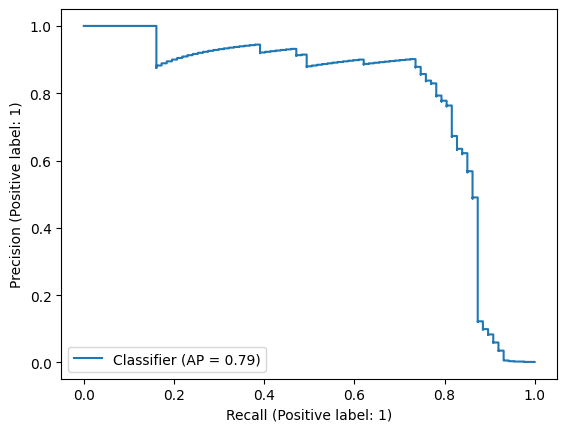

In [35]:
PrecisionRecallDisplay.from_predictions(y_test, dense_test_preds)

##CNN

In [36]:
def create_cnn():
  model = Sequential()
  
  model.add(Conv1D(256, 2, activation='relu', padding ='valid', input_shape=(X_train_norm.shape[-1],1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  # model.add(Conv1D(256, 2, activation='relu', padding ='valid', input_shape=(X_train_norm.shape[-1],1)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.2))

  model.add(Flatten())
  #model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model

In [37]:
cnn=create_cnn()
cnn.summary()
cnn.fit(X_train_norm,y_train, batch_size=512, epochs=50, verbose=2, validation_data=(X_val_norm,y_val), class_weight={0: 0.35**2, 1: (1-0.35)**2})

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 28, 256)           768       
                                                                 
 batch_normalization_1 (Batc  (None, 28, 256)          1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 256)           0         
                                                                 
 flatten_1 (Flatten)         (None, 7168)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 7169      
                                                                 
Total params: 8,961
Trainable params: 8,449
Non-trainable params: 512
__________________________________________________

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


127/127 - 4s - loss: 0.0062 - precision: 0.4564 - recall: 0.8005 - prc: 0.6785 - val_loss: 0.1869 - val_precision: 0.8136 - val_recall: 0.7619 - val_prc: 0.6790 - 4s/epoch - 29ms/step
Epoch 2/50
127/127 - 1s - loss: 0.0046 - precision: 0.7213 - recall: 0.7771 - prc: 0.7147 - val_loss: 0.0693 - val_precision: 0.7692 - val_recall: 0.7937 - val_prc: 0.7139 - 1s/epoch - 8ms/step
Epoch 3/50
127/127 - 1s - loss: 0.0041 - precision: 0.7530 - recall: 0.7833 - prc: 0.7149 - val_loss: 0.0185 - val_precision: 0.7812 - val_recall: 0.7937 - val_prc: 0.7352 - 1s/epoch - 8ms/step
Epoch 4/50
127/127 - 1s - loss: 0.0041 - precision: 0.7262 - recall: 0.7802 - prc: 0.7382 - val_loss: 0.0103 - val_precision: 0.7353 - val_recall: 0.7937 - val_prc: 0.6793 - 1s/epoch - 8ms/step
Epoch 5/50
127/127 - 1s - loss: 0.0035 - precision: 0.7364 - recall: 0.7957 - prc: 0.7491 - val_loss: 0.0069 - val_precision: 0.7183 - val_recall: 0.8095 - val_prc: 0.7312 - 1s/epoch - 8ms/step
Epoch 6/50
127/127 - 1s - loss: 0.0037 -

In [38]:
cnn_test_preds= cnn.predict(X_test_norm)
cnn_val_preds = cnn.predict(X_val_norm)

1419/1419 [==============================] - 2s 2ms/step


In [39]:
m=keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_test, cnn_test_preds)
m.result().numpy()

0.73245907

In [40]:
m=keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_val, cnn_val_preds)
m.result().numpy()

0.7145642

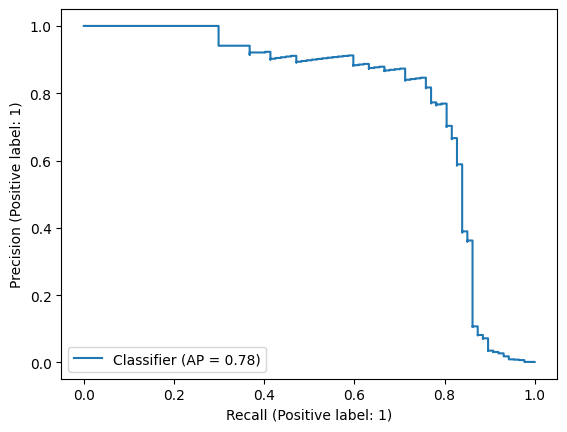

In [41]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, cnn_test_preds)

In [42]:
print(classification_report(y_test, cnn_test_preds>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.77      0.80      0.79        87

    accuracy                           1.00     56746
   macro avg       0.88      0.90      0.89     56746
weighted avg       1.00      1.00      1.00     56746



#FS

In [ ]:
X_train = X_train[[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'Amount']]
X_test = x_test[[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'Amount']]
X_val = x_val[[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'Amount']]

In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount
0,-0.776250,0.570153,1.415719,0.139392,-0.934473,-0.134084,-0.225937,0.690748,-0.136626,-0.491977,49.775
1,-0.533484,-3.549124,-0.750384,0.225106,-1.974226,-0.733971,1.015846,-0.552599,-1.122843,0.186828,1006.950
2,-4.055118,-2.855461,-5.498679,0.564467,-15.165565,8.535960,15.126554,-2.831633,-0.143379,-2.933269,3502.130
3,-2.053442,-0.640250,-0.259325,-1.955024,-1.373383,2.302825,1.775314,0.188454,0.821384,-0.942763,460.000
4,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,10199.440
...,...,...,...,...,...,...,...,...,...,...,...
64918,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,-0.373927,1.000
64919,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,-0.357616,571.480
64920,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,-7.509557,0.380
64921,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,-1.363724,-2.932895,1.000


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train[['Amount']])
X_train['norm_amount']=scalar.transform(X_train[['Amount']])
X_val['norm_amount']=scalar.transform(X_val[['Amount']])
X_test['norm_amount']=scalar.transform(X_test[['Amount']])

<ipython-input-12-e26afdcc33ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['norm_amount']=scalar.transform(X_val[['Amount']])
<ipython-input-12-e26afdcc33ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['norm_amount']=scalar.transform(X_test[['Amount']])


In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount,norm_amount
0,-0.776250,0.570153,1.415719,0.139392,-0.934473,-0.134084,-0.225937,0.690748,-0.136626,-0.491977,49.775,-0.329064
1,-0.533484,-3.549124,-0.750384,0.225106,-1.974226,-0.733971,1.015846,-0.552599,-1.122843,0.186828,1006.950,2.210274
2,-4.055118,-2.855461,-5.498679,0.564467,-15.165565,8.535960,15.126554,-2.831633,-0.143379,-2.933269,3502.130,8.829863
3,-2.053442,-0.640250,-0.259325,-1.955024,-1.373383,2.302825,1.775314,0.188454,0.821384,-0.942763,460.000,0.759243
4,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,10199.440,26.597496
...,...,...,...,...,...,...,...,...,...,...,...,...
64918,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,-0.373927,1.000,-0.458461
64919,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,-0.357616,571.480,1.054994
64920,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,-7.509557,0.380,-0.460106
64921,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,-1.363724,-2.932895,1.000,-0.458461
